In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#4.Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [5]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


#5. How many rows and columns are in gdp_df? What are the data types of each column?

In [7]:
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]


In [8]:
#6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
gdp_df = gdp_df.drop('Value Footnotes', axis='columns').rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [10]:
#7.How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [11]:
countries= gdp_df.groupby('Country')['Year'].count()

In [12]:
countries= countries.reset_index()

In [13]:
countries= countries.rename(columns={'Year' :'count_of_year'})

In [14]:
countries

,Country,count_of_year
0,Afghanistan,20
1,Africa Eastern and Southern,33
2,Africa Western and Central,33
3,Albania,33
4,Algeria,33
...,...,...
237,Viet Nam,33
238,West Bank and Gaza,29
239,World,33
240,Zambia,33


In [15]:
countries[countries['count_of_year']<33].count()

Country          40
count_of_year    40
dtype: int64

In [16]:
#8.In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [17]:
gdp_2020 = gdp_df[gdp_df['Year']==2020]

Text(0.5, 1.0, 'Histogram Per GDP Per Capita')

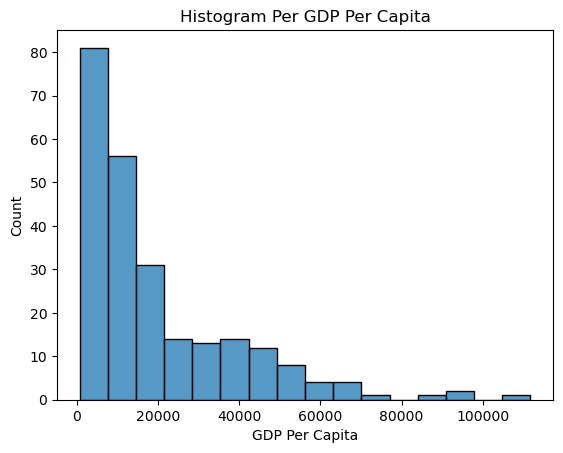

In [18]:
sns.histplot(data= gdp_2020, x = 'GDP_Per_Capita')
plt.xlabel('GDP Per Capita')
plt.title('Histogram Per GDP Per Capita')

Text(0.5, 1.0, 'Density Plot for GDP Per Capita')

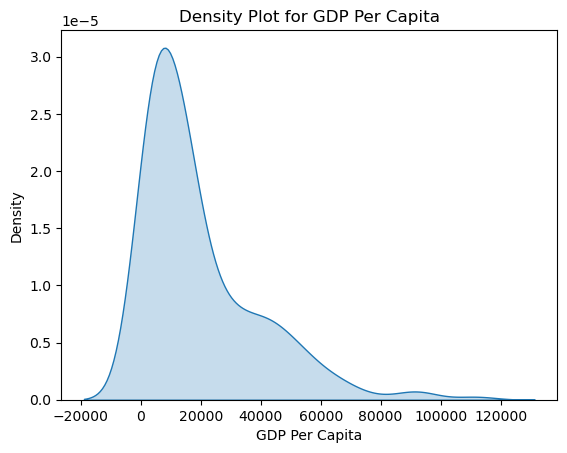

In [19]:
sns.kdeplot(data= gdp_2020, x = 'GDP_Per_Capita', fill = 'skyblue')
plt.xlabel('GDP Per Capita')
plt.title('Density Plot for GDP Per Capita')

Text(0.5, 1.0, 'Box Plot for GDP Per Capita')

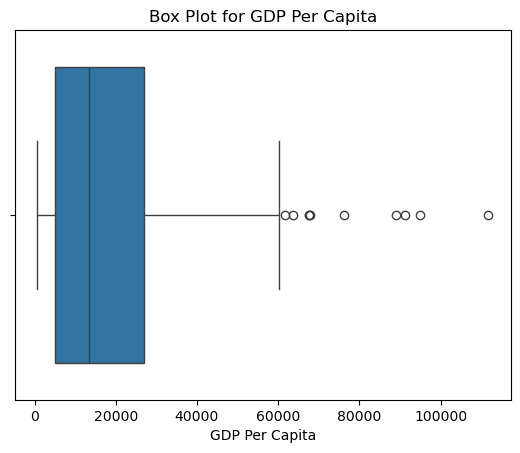

In [20]:
sns.boxplot(data= gdp_2020, x = 'GDP_Per_Capita')
plt.xlabel('GDP Per Capita')
plt.title('Box Plot for GDP Per Capita')

Text(0.5, 1.0, 'Violin Plot for GDP Per Capita')

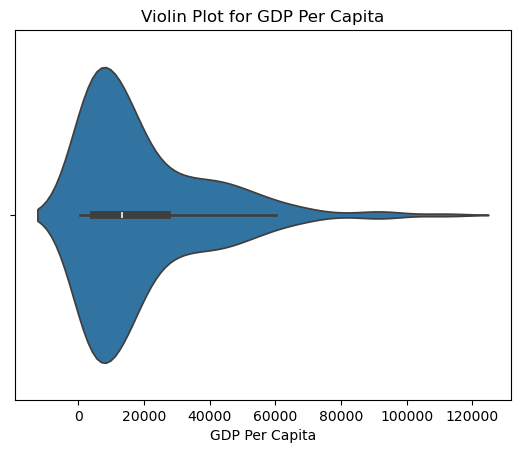

In [21]:
sns.violinplot(data= gdp_2020, x = 'GDP_Per_Capita')
plt.xlabel('GDP Per Capita')
plt.title('Violin Plot for GDP Per Capita')

In [22]:
#9. What was the median GDP per capita value in 2020?

In [23]:
gdp_2020['GDP_Per_Capita'].median()

13357.997573370474

In [24]:
#10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots


In [25]:
my_years= [1990,2000,2010,2020]

In [26]:
my_years

[1990, 2000, 2010, 2020]

In [27]:
gdp_df['Year'].isin(my_years)

0       False
1        True
2       False
3       False
4       False
        ...  
7657    False
7658    False
7659    False
7660    False
7661     True
Name: Year, Length: 7662, dtype: bool

In [28]:
gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


In [29]:
gdp_decades = gdp_df[gdp_df['Year'].isin(my_years)]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

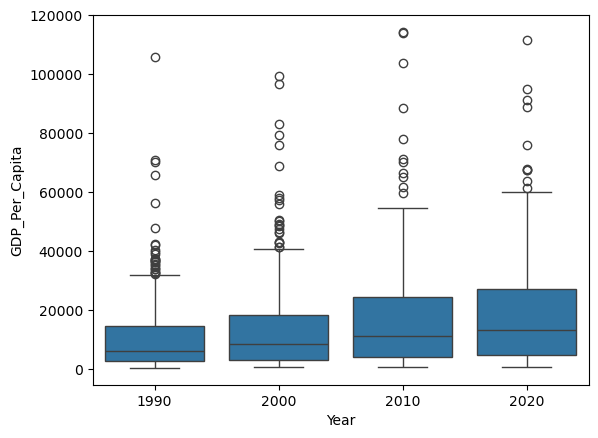

In [30]:
# box plot
sns.boxplot(data = gdp_decades,
           x='Year',
           y = 'GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

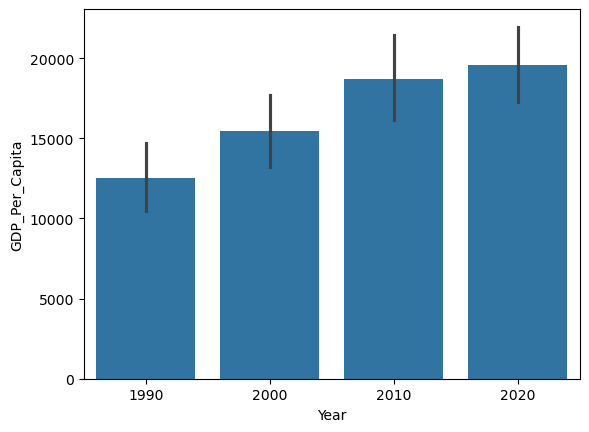

In [31]:
# bar plot
sns.barplot(data = gdp_decades,
           x='Year',
           y = 'GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

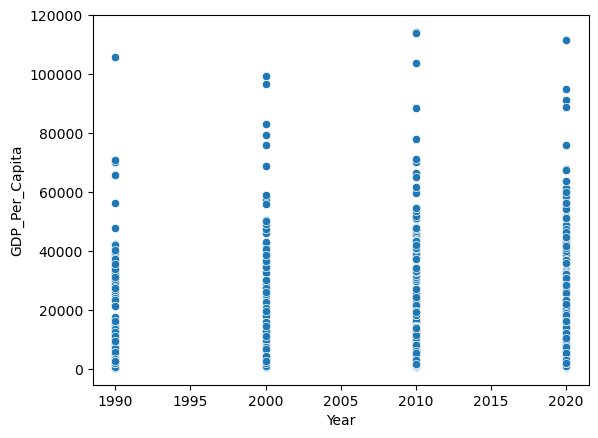

In [32]:
sns.scatterplot(data=gdp_decades,
               x='Year',
               y='GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

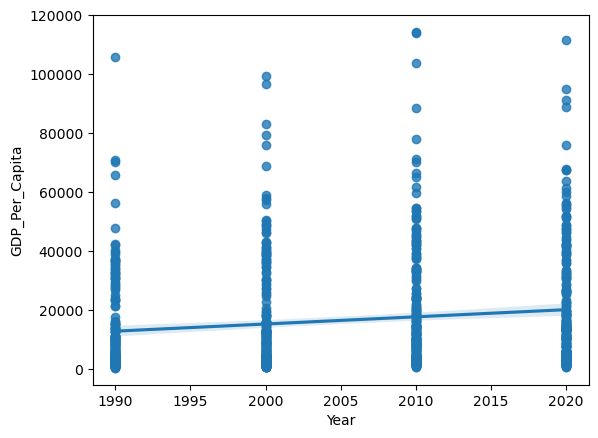

In [33]:
sns.regplot(data = gdp_decades, 
            x = 'Year', 
            y = 'GDP_Per_Capita')

In [34]:
##Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [35]:
#11.Which country was the first to have a GDP per capita greater than $100,000?

In [36]:
gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values('Year').head()

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098


In [37]:
#12.Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.


In [38]:
gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [39]:
gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')['Country'].tolist()[0]

'Luxembourg'

In [40]:
top_country= gdp_df[gdp_df['Country']=='Luxembourg']

In [41]:
top_country

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


<Axes: xlabel='Year'>

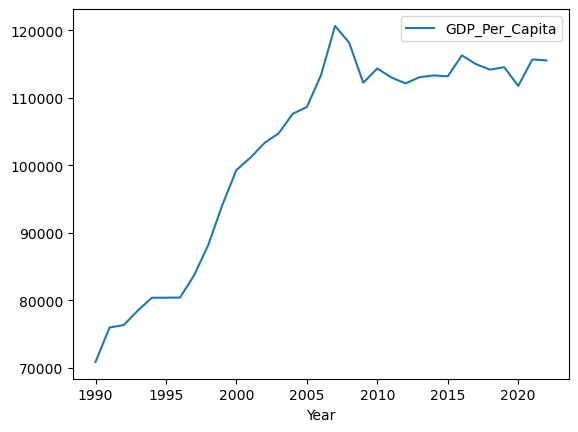

In [42]:
top_country.plot(x='Year', y='GDP_Per_Capita', kind='line')

In [43]:
#13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?


In [44]:
gdp_df[gdp_df['Year']==2020].nsmallest(1,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [45]:
gdp_df[gdp_df['Year']==2020].nsmallest(1,'GDP_Per_Capita')['Country'].tolist()[0]

'Burundi'

In [46]:
bottom_country= gdp_df[gdp_df['Country']=='Burundi']

In [47]:
bottom_country

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


<Axes: xlabel='Year'>

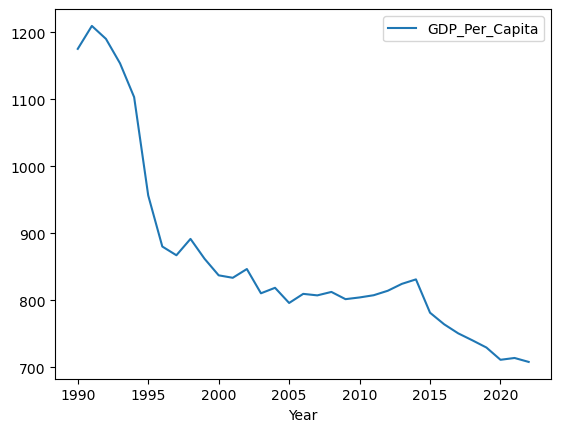

In [48]:
bottom_country.plot(x='Year', y='GDP_Per_Capita', kind='line')

In [49]:
#14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [50]:
internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines='skip')

In [51]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [52]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6375,293,Estimated based on Survey's results. Populatio...,NaN,NaN
6376,294,Preliminary. Country estimate.,NaN,NaN
6377,295,18+. ITU estimate.,NaN,NaN
6378,296,ICT survey. Population age 11+,NaN,NaN
6379,297,Internet users aged 3 years and above who used...,NaN,NaN


In [53]:
#15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [54]:
internet_df = internet_df.drop('Value Footnotes', axis='columns').rename(columns={'Country or Area': 'Country', 'Year' :'Year', 'Value': 'Internet_Users_Pct'})

In [55]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26
...,...,...,...
6375,293,Estimated based on Survey's results. Populatio...,NaN
6376,294,Preliminary. Country estimate.,NaN
6377,295,18+. ITU estimate.,NaN
6378,296,ICT survey. Population age 11+,NaN


In [56]:
#16.Look at the number of observations in this dataset per year. What do you notice?

In [57]:
group = internet_df.groupby(['Year','Country', 'Internet_Users_Pct']) 

In [58]:
group.count()

Empty DataFrame
Columns: []
Index: [(1990, Afghanistan, 0.0), (1990, Albania, 0.0), (1990, Algeria, 0.0), (1990, American Samoa, 0.0), (1990, Andorra, 0.0), (1990, Angola, 0.0), (1990, Anguilla, 0.0), (1990, Antigua and Barbuda, 0.0), (1990, Argentina, 0.0), (1990, Armenia, 0.0), (1990, Aruba, 0.0), (1990, Ascension, 0.0), (1990, Australia, 0.585095), (1990, Austria, 0.130369), (1990, Azerbaijan, 0.0), (1990, Bahamas, 0.0), (1990, Bahrain, 0.0), (1990, Bangladesh, 0.0), (1990, Barbados, 0.0), (1990, Belarus, 0.0), (1990, Belgium, 0.00100674), (1990, Belize, 0.0), (1990, Benin, 0.0), (1990, Bermuda, 0.0), (1990, Bhutan, 0.0), (1990, Bolivia (Plurinational State of), 0.0), (1990, Bosnia and Herzegovina, 0.0), (1990, Botswana, 0.0), (1990, Brazil, 0.0), (1990, British Virgin Islands, 0.0), (1990, Brunei Darussalam, 0.0), (1990, Bulgaria, 0.0), (1990, Burkina Faso, 0.0), (1990, Burundi, 0.0), (1990, Cabo Verde, 0.0), (1990, Cambodia, 0.0), (1990, Cameroon, 0.0), (1990, Canada, 0.361), (1990, Cayman Islands, 0.0), (1990, Central African Republic, 0.0), (1990, Chad, 0.0), (1990, Chile, 0.0), (1990, China, 0.0), (1990, China, Hong Kong Special Administrative Region, 0.0), (1990, China, Macao Special Administrative Region, 0.0), (1990, Colombia, 0.0), (1990, Comoros, 0.0), (1990, Congo (Republic of the), 0.0), (1990, Cook Islands, 0.0), (1990, Costa Rica, 0.0), (1990, Croatia, 0.0), (1990, Cuba, 0.0), (1990, Cyprus, 0.0), (1990, Czech Republic, 0.0), (1990, Côte d'Ivoire, 0.0), (1990, Democratic People's Republic of Korea, 0.0), (1990, Democratic Republic of the Congo, 0.0), (1990, Denmark, 0.0972773), (1990, Djibouti, 0.0), (1990, Dominica, 0.0), (1990, Dominican Republic, 0.0), (1990, Ecuador, 0.0), (1990, Egypt, 0.0), (1990, El Salvador, 0.0), (1990, Equatorial Guinea, 0.0), (1990, Eritrea, 0.0), (1990, Estonia, 0.0), (1990, Eswatini, 0.0), (1990, Ethiopia, 0.0), (1990, Falkland (Malvinas) Islands, 0.0), (1990, Faroe Islands, 0.0), (1990, Fiji, 0.0), (1990, Finland, 0.401088), (1990, France, 0.0527779), (1990, French Guiana, 0.0), (1990, French Polynesia, 0.0), (1990, Gabon, 0.0), (1990, Gambia, 0.0), (1990, Georgia, 0.0), (1990, Germany, 0.125892), (1990, Ghana, 0.0), (1990, Gibraltar, 0.0), (1990, Greece, 0.0), (1990, Greenland, 0.0), (1990, Grenada, 0.0), (1990, Guadeloupe, 0.0), (1990, Guam, 0.0), (1990, Guatemala, 0.0), (1990, Guernsey, 0.0), (1990, Guinea, 0.0), (1990, Guinea-Bissau, 0.0), (1990, Guyana, 0.0), (1990, Haiti, 0.0), (1990, Honduras, 0.0), (1990, Hungary, 0.0), (1990, Iceland, 0.0), (1990, India, 0.0), (1990, Indonesia, 0.0), (1990, Iran (Islamic Republic of), 0.0), (1990, Iraq, 0.0), ...]

[6083 rows x 0 columns]

In [59]:
#17. What is the first year to have a non-zero internet users percentage value?

In [60]:
internet_df[internet_df['Internet_Users_Pct']>1].sort_values('Year').head()

,Country,Year,Internet_Users_Pct
4196,Norway,1991,1.40740
5809,United States,1991,1.16319
305,Australia,1991,1.09720
2000,Finland,1991,1.39744
5298,Sweden,1991,1.16052


In [61]:
#18. How does the distribution of internet users percent differ for 2000 and 2014?